<a href="https://colab.research.google.com/github/vavana619/Dacon-Daily-Python-Camp/blob/main/Lv3_%EC%A0%84%EC%B2%98%EB%A6%AC_3_4_%EC%88%98%EC%B9%98%ED%98%95_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%95%EA%B7%9C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

# 수치형 데이터 정규화 방법 -> "Min Max Scailing"
: 가장 작은 값은 0으로, 가장 큰 값은 1로 만들어주는 방법, 그 사이의 값들은 비율에 따라서 0~1 사이에 분포하게 됨

In [1]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.
!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-05-19 09:51:27--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-05-19 09:51:27--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 74.125.142.100, 74.125.142.138, 74.125.142.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4n2oi12516qo57kd3qnd36oo3jt8jfi8/1652953875000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2022-05-19 09:51:28--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937

In [2]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
# read_csv() 매서드로 train.csv 파일을 df class 로 불러오세요.
train = pd.read_csv('data/train.csv')

## 👋 실습
---

In [4]:
# describe를 통해 "fixed acidity"의 데이터의 분포가 어떻게 생겼는지 짐작해보세요
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


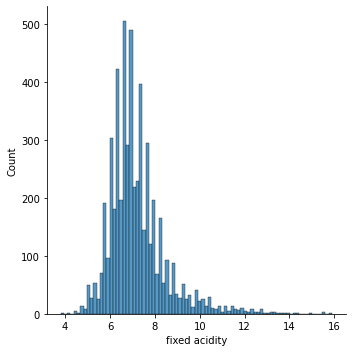

In [5]:
# seaborn의 displot을 통해 "fixed acidity"의 distplot을 그려보세요
sns.displot(train["fixed acidity"])

In [6]:
# MinMaxScaler를 "scaler"라는 변수에 지정해주세요
scaler = MinMaxScaler()

In [9]:
# "scaler"를 학습시켜주세요
scaler.fit(train[["fixed acidity"]]) # fit() 함수 안에 데이터프레임 형태로 들어가야함!

MinMaxScaler()

In [11]:
# "scaler"를 통해 train의 "fixed acidity"를 바꾸어 "Scaled fixed acidity"라는 column에 저장해주세요
train["Scaled fixed acidity"] = scaler.transform(train[["fixed acidity"]])

In [13]:
train["Scaled fixed acidity"] # 비율에 따라서 0~1 사이에 분포하게 됨

0       0.148760
1       0.413223
2       0.338843
3       0.264463
4       0.330579
          ...   
5492    0.322314
5493    0.206612
5494    0.330579
5495    0.231405
5496    0.264463
Name: Scaled fixed acidity, Length: 5497, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


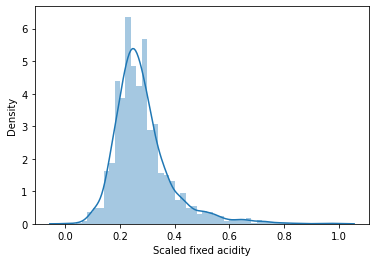

In [12]:
# seaborn의 displot을 통해 "Scaled fixed acidity"의 distplot을 그려보세요
sns.distplot(train["Scaled fixed acidity"])

## 정답
---

In [ ]:
# describe를 통해 "fixed acidity"의 데이터의 분포가 어떻게 생겼는지 짐작해보세요
train.describe()

In [ ]:
# seaborn의 displot을 통해 "fixed acidity"의 distplot을 그려보세요

sns.distplot(train['fixed acidity'])

In [ ]:
# MinMaxScaler를 "scaler"라는 변수에 지정해주세요

scaler = MinMaxScaler()

In [ ]:
# "scaler"를 학습시켜주세요

scaler.fit(train[['fixed acidity']])

In [ ]:
# "scaler"를 통해 train의 "fixed acidity"를 바꾸어 "Scaled fixed acidity"라는 column에 저장해주세요

train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

In [ ]:
# seaborn의 displot을 통해 "Scaled fixed acidity"의 distplot을 그려보세요

sns.distplot(train['Scaled fixed acidity'])

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)